In [17]:
pip install pandas scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
#A1
import pandas as pd
import numpy as np

# Creating the DataFrame
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
}

df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-9) )  # Adding a small value to avoid log(0)

# Function to calculate Information Gain
def information_gain(data, split_col, target_col):
    # Calculate the entropy of the original data
    total_entropy = entropy(data[target_col])

    # Calculate the weighted entropy after the split
    values, counts = np.unique(data[split_col], return_counts=True)
    weighted_entropy = 0

    for value, count in zip(values, counts):
        subset = data[data[split_col] == value]
        weighted_entropy += (count / sum(counts)) * entropy(subset[target_col])

    # Information Gain is the difference between the original entropy and the weighted entropy
    return total_entropy - weighted_entropy

# Attributes to consider for the split
features = ['age', 'income', 'student', 'credit_rating']
target = 'buys_computer'

# Calculate Information Gain for each feature
info_gains = {feature: information_gain(df, feature, target) for feature in features}

# Display Information Gains
for feature, gain in info_gains.items():
    print(f'Information Gain for {feature}: {gain}')

# Identify the feature with the highest Information Gain
best_feature = max(info_gains, key=info_gains.get)
print(f'\nThe feature to select for the root node is: {best_feature}')


Information Gain for age: 0.059898247292593076
Information Gain for income: 0.0391486719030707
Information Gain for student: 0.2578314624597724
Information Gain for credit_rating: 0.12808527889139443

The feature to select for the root node is: student


In [30]:
#A2
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Create DataFrame
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high', 'medium', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'fair', 'excellent', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no']
}

df = pd.DataFrame(data)

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Create and fit Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Get depth of the tree
depth = tree.get_depth()

print(f'The depth of the decision tree is: {depth}')


The depth of the decision tree is: 4


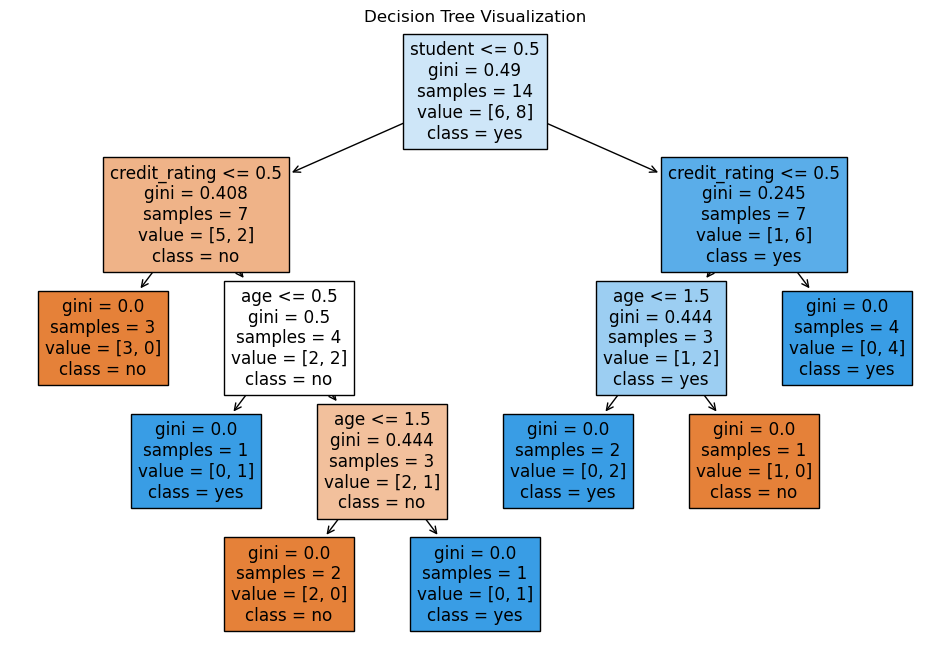

In [31]:
#A3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Visualize obtained decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=list(X.columns), class_names=list(label_encoders['buys_computer'].classes_), filled=True)
plt.title("Decision Tree Visualization")
plt.show()



In [41]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('loan_data_1.csv')

Training Accuracy: 0.8717
Test Accuracy: 0.5974


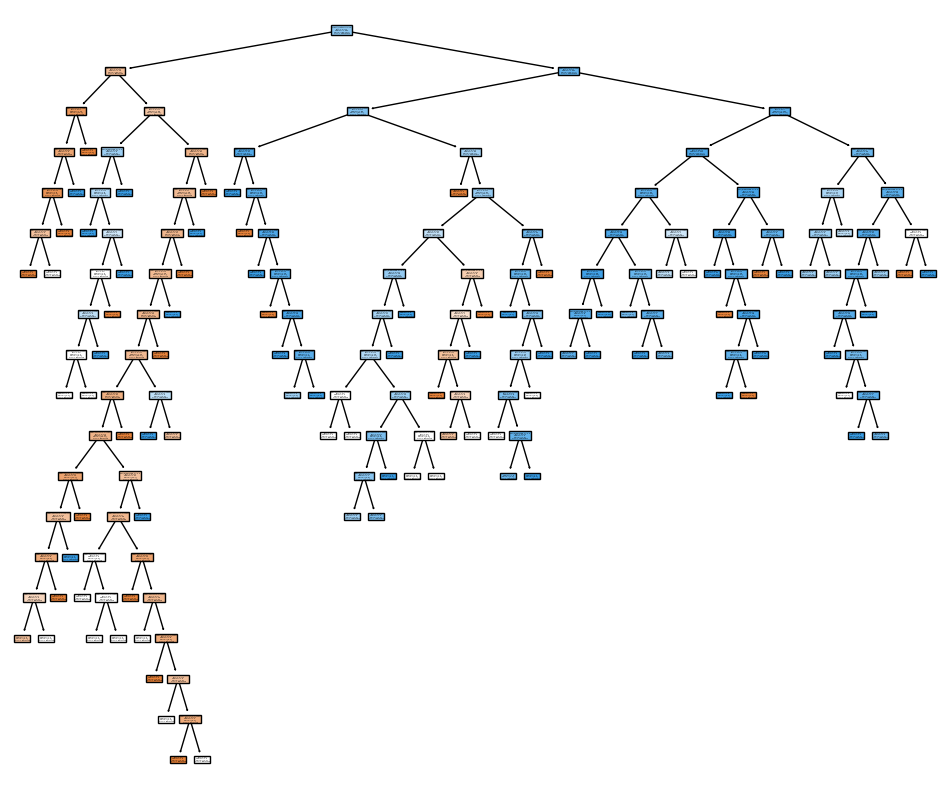

In [47]:
#A4
# Convert categorical columns
data['Credit_History'] = data['Credit_History'].fillna(0) 
data['Self_Employed'] = data['Self_Employed'].fillna('No')  
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())  


le = LabelEncoder()
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])  
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])  

# Prepare data for model
X = data[['Credit_History', 'Self_Employed', 'LoanAmount']]  
y = data['Loan_Status'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on training data
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on test data
y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output accuracies
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot Decision Tree
plt.figure(figsize=(12,10))

# Convert feature names to a list and plot the tree
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['Rejected', 'Approved'], filled=True)

plt.show()
